In [1]:
from utils import *
import matplotlib.pyplot as plt
%matplotlib inline

# **Download Dataset from Roboflow**

In [2]:
# download_dataset('./data/tf-record-datasets', 'capstone-foodlabel', 4, "tfrecord")

# **Trained Model**

In [3]:
# load the models
model = get_model("./models/detect-nutrition-label.pt")

# **Examples**

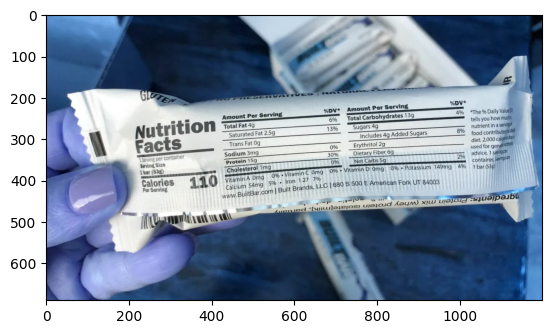

In [5]:
# example = './data/datasets/valid/images/20240515_163153_png.rf.e24f200366cb3b91bbea9a16b42d5590.jpg'
example = './Built-Bar-nutrition-label-e1709225599670.webp'

image = cv2.imread(example)

plt.imshow(image)

In [6]:
prediction = model.predict(example)
x1, y1, x2, y2 = get_bounding_boxes(prediction)

print(f"---\nx1: {x1}\nx2: {x2}\ny1: {y1}\ny2: {y2}")


image 1/1 /Users/mafiefa/Projects/machine-learning-kaisar/Built-Bar-nutrition-label-e1709225599670.webp: 384x640 1 nutrition-label, 71.4ms
Speed: 1.5ms preprocess, 71.4ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)
---
x1: 95.52336883544922
x2: 1190.9635009765625
y1: 210.6234588623047
y2: 514.3389892578125


In [7]:
image_cropped = cropAndResize(image, (x1, y1, x2, y2))
image_preprocessed = preprocess_for_ocr(image_cropped, enhance=2)

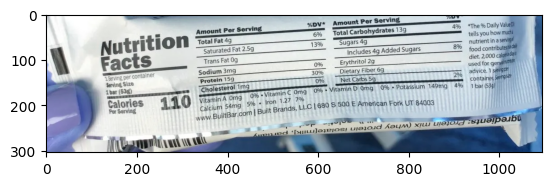

In [8]:
plt.imshow(image_cropped)

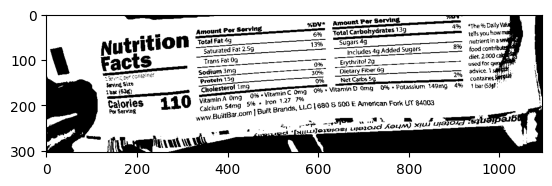

In [9]:
plt.imshow(image_preprocessed)

In [10]:
text_data = ocr(image_preprocessed)

In [11]:
preprocessed_reading = preprocess_ocr_reading(text_data)

for data in preprocessed_reading:
    print(data)

KDV:
Amount Per Serving,
ah
“The Daily
Amount Per Serving
Ea
Total Carbonydrates 13g
tetis you howi
putrentina!
Total Fat 4g
13g
Sugars 4g
3gg
Nu
trition
Saturated Fat 2.5g
Includes Ag Added Sugars
food contil
diet. 2000:
“Trans Fat 0g
ox
Erythritol 2g
usedfor
bkn aa
Sodium 3m9
Ec
Dietary Fiber 6g
advice.
Intgine!
Net Catbs5
Ea
containet:
setan
Protein 15g
KE
“hat 1536) ..
aa anu
Vitamir
NA 0mg 046
21
» h00127
talories
Per Sering
110
Cakcium 54m9
To 18805500E American Fork UT 84003
mi
Bulit Brands,
www.BultBar co
wu
An
“
bal
be 21TP
dl Kom)
un OA AU
kunjonerosi UIO1ON
Ba ANE LINA RA


In [12]:
nutrients_list = make_list('./data/nutrients.txt')

print(nutrients_list)

['Serving', 'Sajian', 'Energi', 'Energy', 'Lemak', 'Fat', 'Karbohidrat', 'Carbohydrate', 'Gula', 'Sugar', 'Sugars', 'Vitamin', 'Protein', 'Garam', 'Natrium', 'Salt', 'Sodium', 'Serat', 'Fiber', 'Kalori', 'Calories', 'Calorie', 'Kolesterol', 'Cholesterol', 'Iron', 'Besi', 'Potassium', 'Kalium', 'Kalsium', 'Calcium', 'Mineral']


In [13]:
cleaned = get_nutrient_label_value(preprocessed_reading, nutrients_list=nutrients_list)

print(cleaned)

L  V Amount Per Serving,
L  V Amount Per Serving
L (13.0, 'g') V Total Fat 4g
L (3.0, 'gg') V Sugars 4g
L (3.0, 'gg') V Sugars 4g
L  V Saturated Fat 2.5g
L  V Includes Ag Added Sugars
L  V Includes Ag Added Sugars
L  V “Trans Fat 0g
L  V Sodium 3m9
L  V Dietary Fiber 6g
L  V Protein 15g
[['Amount Per Serving', ''], ['Amount Per Serving,', ''], ['Dietary Fiber 6g', ''], ['Includes Ag Added Sugars', ''], ['Protein 15g', ''], ['Saturated Fat 2.5g', ''], ['Sodium 3m9', ''], ['Sugars 4g', (3.0, 'gg')], ['Total Fat 4g', (13.0, 'g')], ['“Trans Fat 0g', '']]


In [14]:
corrected_readings = correct_readings(cleaned)

print(corrected_readings)

[['Amount Per Serving', ''], ['Amount Per Serving,', ''], ['Dietary Fiber', (6.0, 'g')], ['Includes Ag Added Sugars', ''], ['Protein', (15.0, 'g')], ['Saturated Fat', (2.5, 'g')], ['Sodium 3m9', ''], ['Sugars', (4.0, 'g')], ['Total Fat', (4.0, 'g')], ['“Trans Fat', (0.0, 'g')]]


In [15]:
print(to_nutritional_dict(label_value_list=corrected_readings))

{'sajian': [], 'energi': [], 'karbohidrat': [], 'gula': [(4.0, 'g')], 'protein': [(15.0, 'g')], 'vitamin': [], 'lemak': [(2.5, 'g'), (4.0, 'g'), (0.0, 'g')], 'garam': [], 'kalori': [], 'serat': [(6.0, 'g')], 'kolesterol': [], 'mineral': []}
